# Assignment 2 Part 1

## Task 1 (70 marks)

###  In this part of assignment you'll be implementing camera matrices and calculating homography between them. The cameras are looking at an arbitrary plane or arbitrarily rotation at a fixed position (you can look at slides 30 & 33 of lecture 9). For this task you can reference slides for camera models (lecture 8 & 9)

In [1]:
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
import math
from scipy.linalg import null_space
%matplotlib notebook
np.random.seed(2)

## Part 1 (20)
### Write a function to generate a set of 100 points on a randomly-oriented 3D plane (alinged along a circle with radius r) or on sphere with radius r (you can choose the radius yourself). Show that your generated points are indeed on a plane or on a sphere  (using show_points) .
### Equation of a plane: Ax+By+Cz+D = 0
### TODO: Make a function gen_points to generate the points and then a function show_points to visualize these (in 3D) (You are free to modify these functions anyway you like)

(100, 4)


/home/moughees/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


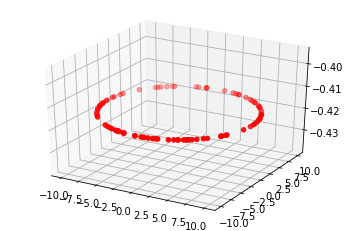

In [2]:
# source https://stackoverflow.com/questions/8487893/generate-all-the-points-on-the-circumference-of-a-circle
def gen_points(A=0,B=0,C=0,D=0,r=10):
    pi = math.pi
    n = 100
    points = []
    z= np.random.randn()
    for x in range(0,n):
        i = np.random.randn()
        angle = 2*pi *np.random.random_sample() - pi
        points.append([math.cos(angle)*r,math.sin(angle)*r,z,1])
    points = np.array(points)
    print(points.shape)
    return points   
            
def show_points(points, d = "r"):
    
    ax = plt.axes(projection='3d')
    
    
    xdata = [i[0] for i in points]
    ydata = [i[1] for i in points]
    zdata = [i[2] for i in points]
    ax.scatter(xdata, ydata, zdata, c=d, cmap='Greens')
      
    ax.figure.show()

    return

def show_points3(points1,points2,points3):
    
    
    backup = points3.transpose()
    points = points1.transpose()

    ax = plt.axes(projection='3d')


    xdata = [i[0] for i in points]
    ydata = [i[1] for i in points]
    zdata = [i[2] for i in points]
#     ax.scatter(xdata, ydata, zdata, c='r', cmap='Greens')

    points = points2.transpose()


    xdata = [i[0] for i in points]
    ydata = [i[1] for i in points]
    zdata = [i[2] for i in points]
    ax.scatter(xdata, ydata, zdata, c='r', cmap='Greens')


    points = backup


    xdata = [i[0] for i in points]
    ydata = [i[1] for i in points]
    zdata = [i[2] for i in points]
    ax.scatter(xdata, ydata, zdata, c='g', cmap='Greens')



    
    return

show_points(gen_points())



In [3]:
plt.close("all")


## Part 2 (5)
### Write a function to setup a camera matrix. You can pass in rotation and transalation as a parameter but for default case they should be set up arbitrarily.
### Camera Matrix (for projective camera) : K * R * T (Where K is intrinsic parameters, R is rotation and T is translation)
### TODO: Write gen_camera_matrix. (You are free to modify these functions anyway you like)

In [4]:
def gen_camera_matrix(R=[],T=[],K = []):
    if len(R) == 0:
        R =  np.random.randn(3,3)
        
    if len(T) == 0:
        T =  np.random.randn(3,1)
        
    ep = np.hstack((R,T))
    if len(K) == 0:
        f = np.random.randn()
        mx = np.random.rand()
        my = np.random.rand()
        intr = np.array([[mx*f, 0 , mx*np.random.rand()],
                         [0,my*f, my*np.random.rand()],
                     [0,0,1]])
    else:
        intr = K
            
#     print("Shape of Camera matrix = ", (intr.dot(ep)).shape)    
    return intr.dot(ep)

In [5]:
print(gen_camera_matrix())

[[ 0.95270803  1.75034286  1.34086754 -2.36014738]
 [-1.34303979  0.13596757  0.83296854 -1.49112728]
 [ 0.62222041  0.96078194  0.75837035 -1.22142917]]


## Part 3 (5)
### Write a function to compute the image coordinates of a list of 3D points on a plane.  
### Camera Matrix (for projective camera) : K * R * T (Where K is intrinsic parameters, R is rotation and T is translation)
### Image Coordinates: C * points (where C is the camera matrix)
### TODO: Write compute_camera_coordinates. (You are free to modify these functions anyway you like)

In [6]:
def compute_camera_coordinates(C,points):
    return np.dot(C,points.transpose())

In [7]:
print(compute_camera_coordinates(gen_camera_matrix(),gen_points()).shape)

(100, 4)
(3, 100)


## Part 4 (30)
### Write a function to compute the homography between two sets of images points.
### Your homography function should be able to select between two cases. 
### 1. Points are taken by two different cameras with arbitrary translation and rotation between the cameras. Both sets are basically the images of same points in 3D (lying on the same plane)
### 2. Points are taken by same camera with arbitrary rotation in the two images.
### TODO: Write compute_homography. (You are free to modify these functions anyway you like)

In [8]:
def gen_A_matrix(x1,y1,x2,y2):
    list1 = [-x1,-y1,-1,0,0,0,x2*x1,x2*y1,x2]
    list2 = [0,0,0,-x1,-y1,-1,y2*x1,y2*y1,y2]
    return list1,list2

In [9]:
def homography(cam1pts,cam2pts):
    hmatrix = []
    for i in range(int(cam1pts.shape[1])):
        list1,list2 = gen_A_matrix(cam1pts[0][i],cam1pts[1][i],cam2pts[0][i],cam2pts[1][i])
        hmatrix.append(list1)
        hmatrix.append(list2)
    hmatrix = np.array(hmatrix) 
#     ns = null_space(hmatrix)
    _,_,ns = np.linalg.svd(hmatrix)
#     print(ns)
#     print(ns[:-1])
    ns = ns[-1].reshape(3,3)
    ns = ns.reshape(3,3)
    return ns
    
    

In [10]:
def normalize(points):
    for i in range(points.shape[1]):
        points[0][i] /= points[2][i]
        points[1][i] /= points[2][i]
        points[2][i] /= points[2][i]
        
    return points    

In [11]:
def compute_homography(case,r): # decide the arguments of this function yourself
    if case == 1:
        points = gen_points(0,0,0,0,r)
        cam1 = gen_camera_matrix()
        cam2 = gen_camera_matrix()
        cam1pts = normalize(compute_camera_coordinates(cam1,points))
        cam2pts = normalize(compute_camera_coordinates(cam2,points))
        
        hmatrix = homography(cam1pts,cam2pts)
        
    if case == 2:
        points = gen_points(0,0,0,0,r)
        
        
        f = np.random.randn()
        mx = np.random.rand()
        my = np.random.rand()
        
        K = np.array([[mx*f, 0 , mx*np.random.rand()],
                         [0,my*f, my*np.random.rand()],
                     [0,0,1]])

        T = np.random.rand(3,1)
        
        cam1 = gen_camera_matrix([],T,K)
        cam2 = gen_camera_matrix([],T,K)
        cam1pts = normalize(compute_camera_coordinates(cam1,points))
        cam2pts = normalize(compute_camera_coordinates(cam2,points))

#         print(cam1pts)
        hmatrix = homography(cam1pts,cam2pts)

        
        
        
    return cam1pts,cam2pts,hmatrix

In [12]:
# compute_homography(1,10)



## Part 5 (10)
### Write a function to compute the error between two set of points after homography is applied.
### TODO: Write error_func. (You are free to modify these functions anyway you like)

In [13]:
def error_func(points1,points2):
    return np.sqrt(np.sum((np.square(points1 - points2))))

In [14]:
print(error_func(gen_points(),gen_points()))


(100, 4)
(100, 4)
144.35172586718645


## Task 2 (30 marks)
### Using what you have already written in task 1, test your results. Take two sets of points using the function in part 3 (while keeping the cases in part 4 in view). Plot one set of points and then using homography between the sets of points, map the other set onto the same image (you can use different colors to differentiate) and see if they are close enough. You have the use the functions from part 1 to achieve this.
### TODO: Use functions from task 1 and give a proper representation of homography calculation

In [15]:
def case1():
    cam1pts,cam2pts,hmatrix = compute_homography(1,10)


    projected_points = normalize(hmatrix.dot(cam1pts))

    print("Error is = ",error_func(projected_points,cam2pts))
    show_points3(cam1pts,cam2pts,projected_points)



    

# A few pointers. Read the slides carefully
## When generating points in task 1, you can use the seed in np.random
## Modify the functions anyway you like
## In order get full points, you have to show both cases otherwise you'll be getting partial credit for the parts the you have solved
## In part 2, to keep things simple define certain parameters like focal length
## Don't go crazy with radius. If your radius is too big there is chance that your error will come out to be large too.
## Solve both tasks in parallel. Make the functions and test them as an implementation of task 2.





## Testing for Case 1 

(100, 4)
Error is =  5.3778835731360347e-11


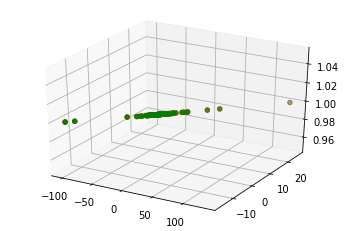

In [16]:
case1()

## Test for Case 2

In [17]:
def case2():
    cam1pts,cam2pts,hmatrix = compute_homography(2,10)


    projected_points = normalize(hmatrix.dot(cam1pts))

    print("Error is = ",error_func(projected_points,cam2pts))
    show_points3(cam1pts,cam2pts,projected_points)



    

(100, 4)
Error is =  2.2264704519202988e-13


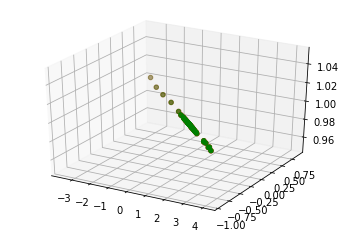

In [18]:
case2()

## Extra Credit (For both undergrad and grad) (15 marks)
### Suggest a few modifications to this algorithm or propose a better algorithm for computing homography. You are free to read and cite any of the other existing methods to compute homography. To get any credit in this part you have to draw comparisons between the given solution and your proposed solution.

### You will only get extra credit if you have done at least 80% of the assignment 

### Write your answer here.

We could use RANSAC, which is the most commonly used tool for computing homographies.
For a number of iterations, a random sample of 4 correspondences is selected and a homography H is computed from
those four correspondences. Each other correspondence is then classified as an inlier or outlier depending on its concurrence with H. After all of the iterations are done, the iteration that contained the largest number of inliers is selected. H can then be recomputed from all of the correspondences that
were consider as inliers in that iteration.

The Difference between the two algorithms is the fact that RANSAC is exhaustive and will consider a much larger set of possibilities than matrix method. It, based on a threshold, selects inliers and outliers.
(source:https://www.cs.ubc.ca/grads/resources/thesis/May09/Dubrofsky_Elan.pdf)